# Star Wars Survey:

In this project, I will be analyzing a Star Wars survey conducted by its fans.

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey.

I'm going to be analysing the survey to answer different types of questions which you will see below (step-by-step).

(c) Miradiz Rakhmatov

## Data Exploration

Let's examine the dataset and see what we can analyize 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
pd.options.display.max_columns = 50

In [3]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [4]:
star_wars.shape

(1186, 38)

## Data Cleaning:


### Step 1.
#### The following columns both have two values (yes, no):
1. 'Do you consider yourself to be a fan of the Star Wars film franchise?'
2. 'Have you seen any of the 6 films in the Star Wars franchise?'

I'm going to change 'Yes' for 'True' and 'No' for 'False'.

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
yes_no_ = {
    "Yes": True,
    "No": False }

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_)


In [8]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


### Part 2.
#### Participants were asked if they had seen each episiode (1-6) in the following columns:

1. Which of the following Star Wars films have you seen? Please select all that apply.
2. Unnamed: 4
3. Unnamed: 5
4. Unnamed: 6
5. Unnamed: 7
6. Unnamed: 8

I'm going to rename all six columns appropriately. Also, I will change the values to True or False since these columns are trying to find out if the respondent had seen each Star Wars episode (1-6).

In [9]:
## create a dictionary for mapping those columns 
seen_map = {}
seen_columns = star_wars.columns[3:9]

for c, r in zip(seen_columns, range(1, len(seen_columns)+1)):
    seen_map[c] = 'seen_episode_{}'.format(r)

seen_map     

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_episode_1',
 'Unnamed: 4': 'seen_episode_2',
 'Unnamed: 5': 'seen_episode_3',
 'Unnamed: 6': 'seen_episode_4',
 'Unnamed: 7': 'seen_episode_5',
 'Unnamed: 8': 'seen_episode_6'}

In [10]:
## rename those six columns according to the dictionary above
star_wars.rename(columns=seen_map, inplace=True)
star_wars.columns[3:9]

## as you can see below, changes to those six columns were made 

Index(['seen_episode_1', 'seen_episode_2', 'seen_episode_3', 'seen_episode_4',
       'seen_episode_5', 'seen_episode_6'],
      dtype='object')

In [11]:
## let's see the content of each of those columns 
for i in range(1, len(seen_columns)+1):
    print(star_wars['seen_episode_{}'.format(i)].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_episode_1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_episode_2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_episode_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_episode_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_episode_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_episode_6, dtype: int64


Since each of the above columns have two distict values i.e. name of the episode and NaN values, I'm going to change the name of the episode for True and NaN values for False. This way we will be able to tell whether or not a respondent have seen the particular episode.

In [12]:
updated_seen_columns = star_wars.columns[3:9]

def transform(x):
    if pd.isnull(x):
        return False
    else:
        return True
    
star_wars[updated_seen_columns] = star_wars[updated_seen_columns].applymap(transform)  
star_wars[updated_seen_columns] ## let's see how the columns look along with their content

,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [13]:
## lets check if the changes were made successfully.
## we can compare the result with the table that we created earlier

for i in range(1, len(updated_seen_columns)+1):
    print(star_wars['seen_episode_{}'.format(i)].value_counts(dropna=False))

True     673
False    513
Name: seen_episode_1, dtype: int64
False    615
True     571
Name: seen_episode_2, dtype: int64
False    636
True     550
Name: seen_episode_3, dtype: int64
True     607
False    579
Name: seen_episode_4, dtype: int64
True     758
False    428
Name: seen_episode_5, dtype: int64
True     738
False    448
Name: seen_episode_6, dtype: int64


### Part 3.
#### Participants were asked to rank each Star Wars episode (1-6) in the following columns:

1. Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
2. Unnamed: 10
3. Unnamed: 11
4. Unnamed: 12
5. Unnamed: 13
6. Unnamed: 14

Again, I'm going to rename all six columns appropriately.

In [14]:
ranking_columns = star_wars.columns[9:15]

star_wars[ranking_columns] = star_wars[ranking_columns].astype(float)
star_wars[ranking_columns].head(5)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


In [15]:
## create a dictionary for mapping which will be used for renaming the columns

ranking_map = {}
for c, i in zip(ranking_columns, range(1, len(ranking_columns)+1)):
    ranking_map[c] = 'ranking_episode_{}'.format(i)

ranking_map

{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_episode_1',
 'Unnamed: 10': 'ranking_episode_2',
 'Unnamed: 11': 'ranking_episode_3',
 'Unnamed: 12': 'ranking_episode_4',
 'Unnamed: 13': 'ranking_episode_5',
 'Unnamed: 14': 'ranking_episode_6'}

In [16]:
## rename those six columns according to the dictionary above
star_wars.rename(columns=ranking_map, inplace=True)

updated_ranking_columns = star_wars.columns[9:15]
star_wars[updated_ranking_columns].head()

,ranking_episode_1,ranking_episode_2,ranking_episode_3,ranking_episode_4,ranking_episode_5,ranking_episode_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


In [17]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,ranking_episode_1,ranking_episode_2,ranking_episode_3,ranking_episode_4,ranking_episode_5,ranking_episode_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


### Part 4.
#### Participants were asked to categorize each Star Wars character (names are unknown in the dataset) in the following columns:

1. Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
2. Unnamed: 16
3. Unnamed: 17
4. Unnamed: 18
5. Unnamed: 19
6. Unnamed: 20
7. Unnamed: 21
8. Unnamed: 22
9. Unnamed: 23
10. Unnamed: 24
11. Unnamed: 25
12. Unnamed: 26
13. Unnamed: 27
14. Unnamed: 28


Again, I'm going to rename all sixteen columns appropriately.


In [18]:
char_columns = star_wars.columns[15:29]
star_wars[char_columns].head(3)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)


In [19]:
## create dictionary a dictionary for mapping 

character_map = {}
for c, i in zip(char_columns, range(1, len(char_columns)+1)):
    character_map[c] = 'character_{}'.format(i)
character_map

{'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'character_1',
 'Unnamed: 16': 'character_2',
 'Unnamed: 17': 'character_3',
 'Unnamed: 18': 'character_4',
 'Unnamed: 19': 'character_5',
 'Unnamed: 20': 'character_6',
 'Unnamed: 21': 'character_7',
 'Unnamed: 22': 'character_8',
 'Unnamed: 23': 'character_9',
 'Unnamed: 24': 'character_10',
 'Unnamed: 25': 'character_11',
 'Unnamed: 26': 'character_12',
 'Unnamed: 27': 'character_13',
 'Unnamed: 28': 'character_14'}

In [20]:
## rename columns according to dictionary 
star_wars.rename(columns=character_map, inplace=True)

updated_chars_columns = star_wars.columns[15:29]
star_wars[updated_chars_columns].head(3)


,character_1,character_2,character_3,character_4,character_5,character_6,character_7,character_8,character_9,character_10,character_11,character_12,character_13,character_14
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)


## Let's look at the cleaned dataset:

In [21]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_episode_1,seen_episode_2,seen_episode_3,seen_episode_4,seen_episode_5,seen_episode_6,ranking_episode_1,ranking_episode_2,ranking_episode_3,ranking_episode_4,ranking_episode_5,ranking_episode_6,character_1,character_2,character_3,character_4,character_5,character_6,character_7,character_8,character_9,character_10,character_11,character_12,character_13,character_14,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


# Data Analysis:

After cleaning the dataset, it's now time to analyze it.

### 1. Analyize ranking of each episode

In [22]:
## create a DataFrame with avarage ranking for each episode
ranking_mean = star_wars[updated_ranking_columns].mean().reset_index()

ranking_mean.rename(columns={'index': 'Episode', 0: 'Ranking'}, inplace=True)
ranking_mean

,Episode,Ranking
0,ranking_episode_1,3.732934
1,ranking_episode_2,4.087321
2,ranking_episode_3,4.341317
3,ranking_episode_4,3.272727
4,ranking_episode_5,2.513158
5,ranking_episode_6,3.047847


In [23]:
## rename the values of Episode column for better illustration

ranking_rename = { 'ranking_episode_1': 'Episode I: The Phantom Menace',
        'ranking_episode_2': 'Episode II:  Attack of the Clones',
        'ranking_episode_3': 'Episode III:  Revenge of the Sith',
        'ranking_episode_4': 'Episode IV:  A New Hope',
        'ranking_episode_5': 'Episode V: The Empire Strikes Back',
        'ranking_episode_6': 'Episode VI: Return of the Jedi'}
for k, v in ranking_rename.items():
    ranking_mean.loc[ranking_mean['Episode'] == k, 'Episode'] = v

ranking_mean

,Episode,Ranking
0,Episode I: The Phantom Menace,3.732934
1,Episode II: Attack of the Clones,4.087321
2,Episode III: Revenge of the Sith,4.341317
3,Episode IV: A New Hope,3.272727
4,Episode V: The Empire Strikes Back,2.513158
5,Episode VI: Return of the Jedi,3.047847


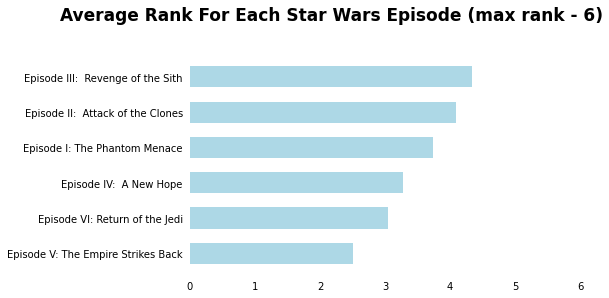

In [24]:
## Plot the above DataFrame
fig, ax = plt.subplots(figsize=(7, 4))
ax.barh(ranking_mean.sort_values('Ranking',ascending=True)['Episode'], ## sorting the DataFrame by values 
        ranking_mean.sort_values('Ranking',ascending=True)['Ranking'],
        height=0.6, color='lightblue')

for location in ['left', 'right', 'top', 'bottom']:
     ax.spines[location].set_visible(False)                             ## remove the entire frame around the bar
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])                                       ## set xtick values
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'])
ax.tick_params(bottom=False, left=False)                           ## remove ticks from labels from both top and left
ax.text(x=-2, y=6.6, s='Average Rank For Each Star Wars Episode (max rank - 6)', size=17, weight='bold')  ## title               

plt.show()

## Findings:

The above bar chart illustrates how each Star Wars episode is ranked from 0 - 6

### 2. Analyze how many responders have seen each episode by gender:

In [25]:
## seperate the dataset by gender
male = star_wars[star_wars["Gender"] == "Male"]
female = star_wars[star_wars["Gender"] == "Female"]

In [26]:
## calculate how many times each episode was watched aggregated by gender.
## result will come out as pd.series which has to be converted into pd.DataFrame by resetting indexes.
m_df = male[updated_seen_columns].sum().reset_index().rename(columns={'index': 'Episode', 0: 'Male'})
f_df = female[updated_seen_columns].sum().reset_index().rename(columns={'index': 'Episode', 0: 'Female'})

In [27]:
## merge two DataFrames on Episode column.
merged = m_df.merge(f_df, how='inner', on='Episode')

## rename values of Episode column to the following:
seen_rename = {'seen_episode_1': 'Episode I: The Phantom Menace',
                'seen_episode_2': 'Episode II:  Attack of the Clones',
                'seen_episode_3': 'Episode III:  Revenge of the Sith',
                'seen_episode_4': 'Episode IV:  A New Hope',
                'seen_episode_5': 'Episode V: The Empire Strikes Back',
                'seen_episode_6': 'Episode VI: Return of the Jedi'}
for k, v in seen_rename.items():
    merged.loc[merged['Episode'] == k, 'Episode'] = v
merged

,Episode,Male,Female
0,Episode I: The Phantom Menace,361,298
1,Episode II: Attack of the Clones,323,237
2,Episode III: Revenge of the Sith,317,222
3,Episode IV: A New Hope,342,255
4,Episode V: The Empire Strikes Back,392,353
5,Episode VI: Return of the Jedi,387,338


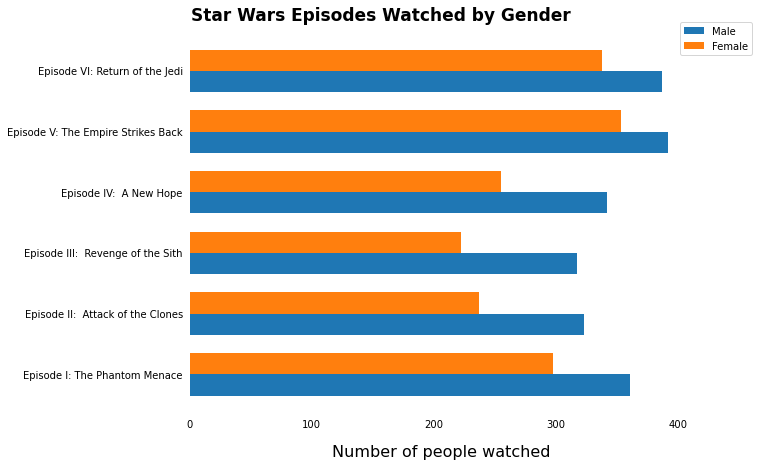

In [28]:
## Plot the above DataFrame
fig, ax = plt.subplots(figsize=(9, 7))
x = np.arange(len(merged['Episode'].unique()))

b1 = ax.barh(x, merged['Male'], label='Male', height=0.35)
b2 = ax.barh(x + 0.35, merged['Female'], label='Female', height=0.35)


for location in ['left', 'right', 'top', 'bottom']:   
    ax.spines[location].set_visible(False) 

ax.set_yticks(x + 0.35 / 2)                        
ax.set_yticklabels(merged['Episode'].unique())    

ax.set_xticks([0, 100, 200, 300, 400])                 
ax.set_xticklabels(['0', '100', '200', '300', '400'])
                                  
ax.tick_params(bottom=False, left=False)

ax.legend()
plt.legend(bbox_to_anchor=(1.13, 1.04), ncol=1)

ax.set_xlabel('Number of people watched', labelpad=15, size=16)
ax.text(x=1, y=6, s='Star Wars Episodes Watched by Gender', size=17, weight='bold')

plt.show()

## Findings:
As you can see above, survey shows that there are less female Star Wars fans than male. The gap is relatively small.

### 3. Analyize each character by number of likes and dislikes:

In [29]:
new_chars = star_wars[updated_chars_columns]
new_chars['character_1'].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: character_1, dtype: int64

#### The above are the values of character_1 column. This is true for all characters (1-14):
* Very favorably 
* Somewhat favorably
* Neither favorably nor unfavorably (neutral) 
* Unfamiliar (N/A) 
* Somewhat unfavorably 
* Very unfavorably 

In [30]:
new_chars.describe()

,character_1,character_2,character_3,character_4,character_5,character_6,character_7,character_8,character_9,character_10,character_11,character_12,character_13,character_14
count,829,831,831,823,825,814,826,820,812,827,830,821,814,826
unique,6,6,6,6,6,6,6,6,6,6,6,6,6,6
top,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very unfavorably,Neither favorably nor unfavorably (neutral),Very favorably
freq,610,552,547,269,591,213,310,236,248,474,562,204,207,605


Since each character column has the same type of values, I'm going to label them in following order:
* 'Very favorably', 'Somewhat favorably' - Likes
* 'Very unfavorably', 'Somewhat unfavorably' - Dislikes 
*  'Neither favorably nor unfavorably (neutral)', 'Unfamiliar (N/A)' - Omit these values


In [31]:
## calculate number of likes by assigning binary values 
likes = star_wars[updated_chars_columns].applymap(lambda x: 1 if x in ['Very favorably', 'Somewhat favorably'] else 0).sum()
likes

character_1     761
character_2     771
character_3     757
character_4     514
character_5     750
character_6     253
character_7     481
character_8     365
character_9     291
character_10    703
character_11    747
character_12    242
character_13    351
character_14    749
dtype: int64

In [32]:
## calculate number of dislikes by assigning binary values
dislikes = star_wars[updated_chars_columns].applymap(lambda x: 1 if x in ['Very unfavorably', 'Somewhat unfavorably'] else 0).sum()
dislikes

character_1       9
character_2      16
character_3      18
character_4     122
character_5      15
character_6     192
character_7     251
character_8      71
character_9     141
character_10     30
character_11     16
character_12    306
character_13     92
character_14     16
dtype: int64

In [33]:
## merge Series by converting them into DataFrames (resetting indexes)
## rename the columns of merged DataFrame accordingly
char_rank = likes.reset_index().merge(dislikes.reset_index(), on='index').rename(columns={'index': 'Characters', '0_x': 'Likes', '0_y': "Dislikes"})
char_rank


,Characters,Likes,Dislikes
0,character_1,761,9
1,character_2,771,16
2,character_3,757,18
3,character_4,514,122
4,character_5,750,15
5,character_6,253,192
6,character_7,481,251
7,character_8,365,71
8,character_9,291,141
9,character_10,703,30


## Findings:

I didn't include any chart for this table since character names were anonymous in survey. I was still able to find how many likes and dislikes each character received.

### 4. Analyize fans by segmentation
 ### I. Groupped by Location:

In [34]:
## Star Wars fans groupped by location
fan_map = {'Location (Census Region)': 'Location',
           'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fans'}
fans_by_location = star_wars.groupby('Location (Census Region)')['Do you consider yourself to be a fan of the Star Wars film franchise?'].sum().reset_index().rename(columns=fan_map).sort_values('Fans', ascending=False)
fans_by_location 

,Location,Fans
6,South Atlantic,88
5,Pacific,86
0,East North Central,84
2,Middle Atlantic,64
7,West North Central,53
8,West South Central,53
3,Mountain,49
4,New England,44
1,East South Central,20


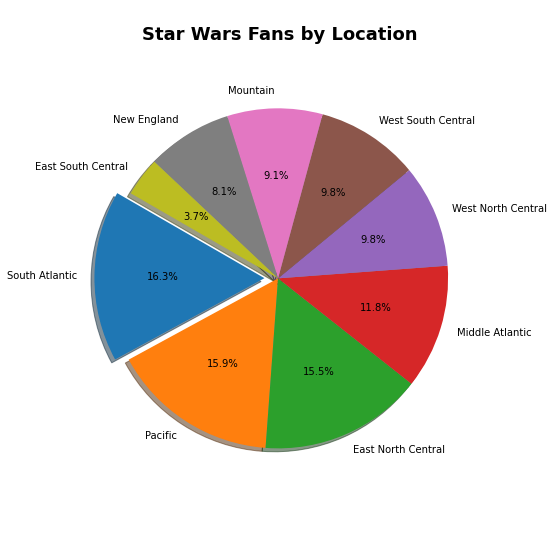

In [35]:
fig, ax = plt.subplots(figsize=(7,10))
ax.pie(fans_by_location['Fans'], 
       labels=fans_by_location['Location'], shadow=True, startangle=150, autopct='%1.1f%%', 
       explode = (0.08, 0, 0, 0, 0, 0, 0, 0, 0 ))
ax.text(x=-0.8, y=1.4, s='Star Wars Fans by Location', size=18, weight='bold')
ax.axis('equal')
plt.show()

## Findings:

In terms of location (Census region), Pacific, South Atlantic and East North Central had the most Star Wars fans at the time of the survey. The three regions comprise a little less than 50% of all Star Wars fans of US.

### II. Groupped by Age:

In [36]:
## Star Wars fans groupped by location
age_map = {'Do you consider yourself to be a fan of the Star Wars film franchise?': 'Fans'}
fans_by_age = star_wars.groupby('Age')['Do you consider yourself to be a fan of the Star Wars film franchise?'].sum().reset_index().rename(columns=age_map)
fans_by_age


,Age,Fans
0,18-29,124
1,30-44,150
2,45-60,154
3,> 60,113


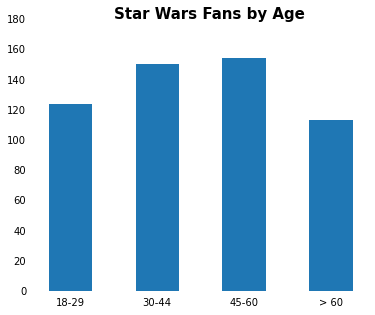

In [37]:
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(fans_by_age['Age'], fans_by_age['Fans'], width=0.5)

for location in ['left', 'right', 'top', 'bottom']:                 
     ax.spines[location].set_visible(False)                             
ax.set_ylim(top=180)                                      
ax.tick_params(bottom=False, left=False)                           
ax.text(x=0.5, y=180, s='Star Wars Fans by Age', size=15, weight='bold')        

plt.show()

## Findings:

It can be concluded from the chart that Star Wars fans are equally distributed amoung different age catergories. That is why it is considered to be one of the classic franchises of all time. 

# The End